In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
# read file
ds = pd.read_csv('water_potability (1).csv')

In [24]:
ds.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1.0


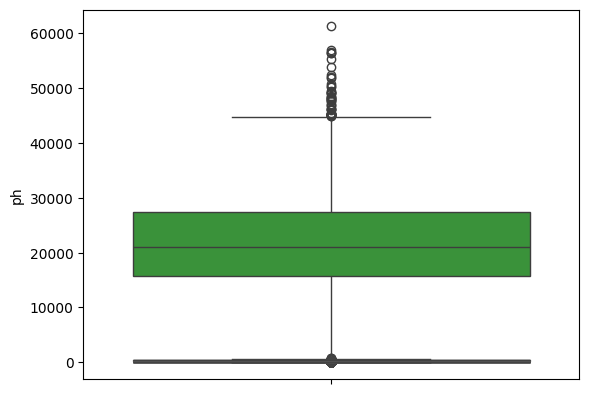

In [26]:
# handling the null values
from sklearn.impute import SimpleImputer
for i in ds.columns:
  q1 = ds[i].quantile(0.25)
  q2 = ds[i].quantile(0.75)
  IQR = q2 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q2 + 1.5 * IQR
  outliers = ds[(ds[i] < lower_bound) | (ds[i] > upper_bound)]
  if (len(outliers) > 0):
    sns.boxplot(ds[i]) # showing the outliers
    imp = SimpleImputer(strategy = 'median')
    ds[[i]] = imp.fit_transform(ds[[i]])
  else:
    imp = SimpleImputer(strategy = 'mean')
    ds[[i]] = imp.fit_transform(ds[[i]])
ds

In [28]:
ds.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [29]:
# Train and Test

x = ds.drop('Potability', axis = 1)
y = ds['Potability']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [34]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [35]:
predict_y = clf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_y, y_test)

0.6265243902439024